In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier


In [2]:
df = pd.read_csv(r'C:\Users\Sumanth\Desktop\FEATURE ENGINEERING\healthcare.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()  #only bmi has few null values
df.drop('id', axis = 1,inplace = True) #dropping id column since it is of no significance
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type 

In [4]:
#understanding the data inside our Object data type columns
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}


{'gender': 3,
 'ever_married': 2,
 'work_type': 5,
 'Residence_type': 2,
 'smoking_status': 4}

In [ ]:
#Below columns have just 2 unique values so we can do Binary encoding using a simple replce function

In [5]:
df['ever_married'].unique()


array(['Yes', 'No'], dtype=object)

In [6]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [7]:
df['ever_married'] = df['ever_married'].replace({'Yes':1,'No':0})
df['Residence_type'] = df['Residence_type'].replace({'Urban':1,'Rural':0})

In [8]:
def encoding(df,columns):
    df = df.copy()
    dummies = pd.get_dummies(df[columns], prefix=columns)
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop(columns, axis = 1)
    return df

for column in ['gender', 'work_type','smoking_status']:
    df = encoding(df,columns=column)
    

In [9]:
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,0,202.21,NaN,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.0,1,1,0,0,0,0,0,1,0,0,0,1,0


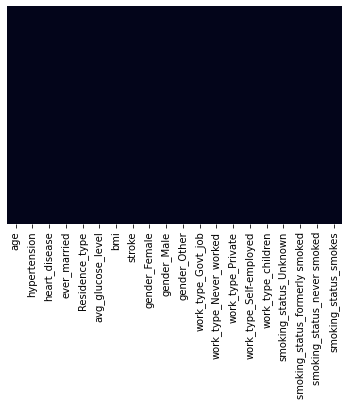

In [10]:

df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
sns.heatmap(df.isnull(),yticklabels=False, cbar = False)

In [11]:
Y = df['stroke']
X = df.drop('stroke',axis=1)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, shuffle = True, random_state=1)

In [ ]:
## another method for filling null values is KNN Imputation
#imputer = KNNImputer()
#imputer.fit(X_train)
#X_train = pd.DataFrame(imputer.transform(X_train), index=X_train.index, columns=X_train.columns)
#X_test = pd.DataFrame(imputer.transform(X_test), index=X_test.index, columns=X_test.columns)


In [13]:
#Scaling of values
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [14]:
X_train.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4313,0.608843,-0.330374,-0.238161,0.719002,0.994146,0.638258,0.014158,-1.174021,1.174021,0.0,-0.383679,-0.069103,0.864050,-0.438105,-0.392264,1.515511,-0.461023,-0.763376,-0.425344
376,-1.886989,-0.330374,-0.238161,-1.390817,-1.005888,-0.386663,-1.765744,0.851774,-0.851774,0.0,-0.383679,-0.069103,-1.157341,-0.438105,2.549304,1.515511,-0.461023,-0.763376,-0.425344
4913,-1.036663,-0.330374,-0.238161,-1.390817,0.994146,-0.466196,-1.111368,-1.174021,1.174021,0.0,-0.383679,-0.069103,0.864050,-0.438105,-0.392264,-0.659843,-0.461023,1.309970,-0.425344
1791,-1.347974,-0.330374,-0.238161,-1.390817,-1.005888,0.697358,-1.412381,-1.174021,1.174021,0.0,-0.383679,-0.069103,-1.157341,-0.438105,2.549304,1.515511,-0.461023,-0.763376,-0.425344
2166,-0.680878,-0.330374,-0.238161,0.719002,-1.005888,1.401291,-0.234505,-1.174021,1.174021,0.0,-0.383679,-0.069103,0.864050,-0.438105,-0.392264,1.515511,-0.461023,-0.763376,-0.425344


In [15]:
X_train.var() # all the variances are close to 1

age                               1.00028
hypertension                      1.00028
heart_disease                     1.00028
ever_married                      1.00028
Residence_type                    1.00028
avg_glucose_level                 1.00028
bmi                               1.00028
gender_Female                     1.00028
gender_Male                       1.00028
gender_Other                      0.00000
work_type_Govt_job                1.00028
work_type_Never_worked            1.00028
work_type_Private                 1.00028
work_type_Self-employed           1.00028
work_type_children                1.00028
smoking_status_Unknown            1.00028
smoking_status_formerly smoked    1.00028
smoking_status_never smoked       1.00028
smoking_status_smokes             1.00028
dtype: float64

In [16]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000010A85DFF7B8>,
      dtype=object)

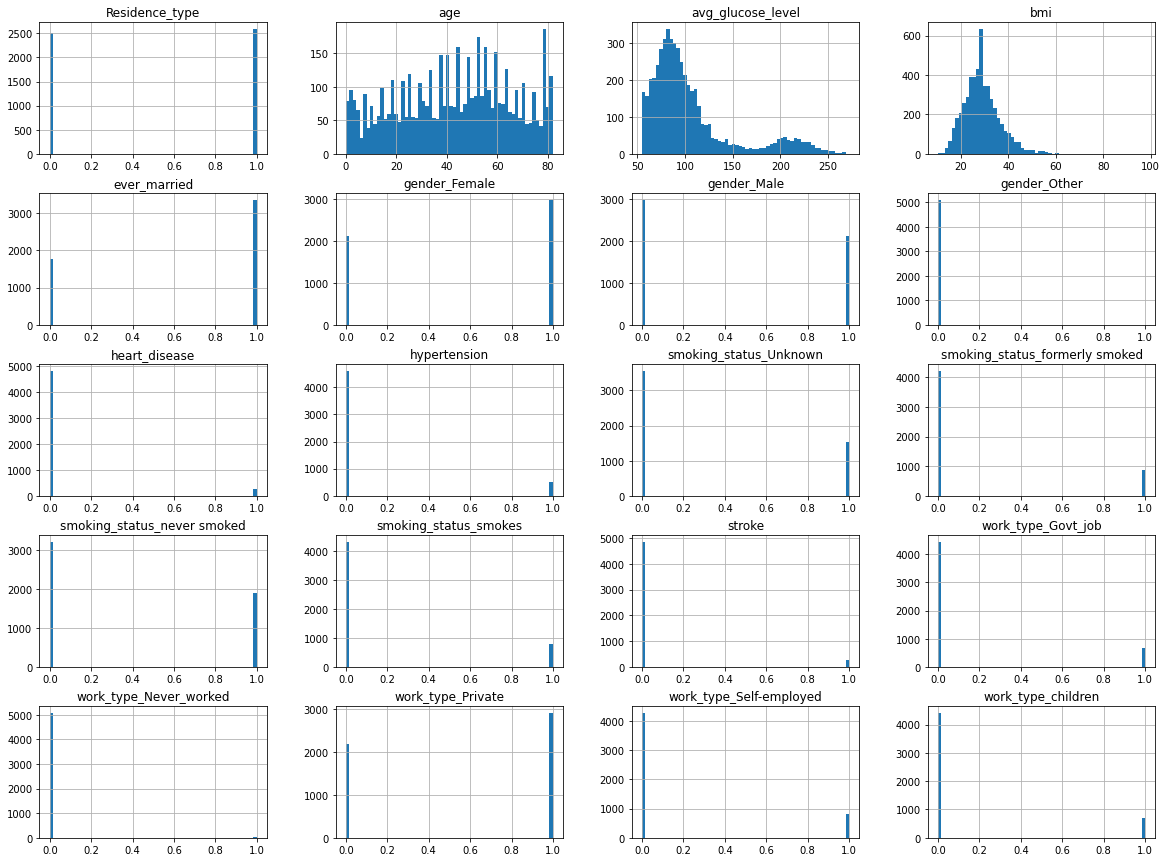

In [17]:
df.hist(bins=60,figsize=(20,15))

In [18]:
data_corr = df.corr()
print(data_corr)



                                     age  hypertension  heart_disease  \
age                             1.000000      0.276398       0.263796   
hypertension                    0.276398      1.000000       0.108306   
heart_disease                   0.263796      0.108306       1.000000   
ever_married                    0.679125      0.164243       0.114644   
Residence_type                  0.014180     -0.007913       0.003092   
avg_glucose_level               0.238171      0.174474       0.161857   
bmi                             0.325942      0.160189       0.038899   
stroke                          0.245257      0.127904       0.134914   
gender_Female                   0.027924     -0.021143      -0.085617   
gender_Male                    -0.027623      0.021275       0.085717   
gender_Other                   -0.010659     -0.004597      -0.003343   
work_type_Govt_job              0.130013      0.017685       0.001330   
work_type_Never_worked         -0.078653     -0.021

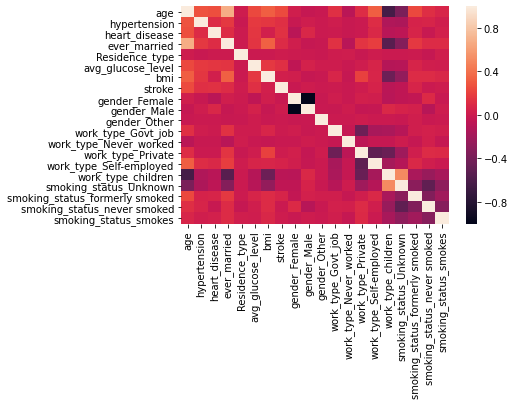

In [19]:
sns.heatmap(data_corr)

In [20]:

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 4313 to 235
Data columns (total 19 columns):
age                               3577 non-null float64
hypertension                      3577 non-null float64
heart_disease                     3577 non-null float64
ever_married                      3577 non-null float64
Residence_type                    3577 non-null float64
avg_glucose_level                 3577 non-null float64
bmi                               3577 non-null float64
gender_Female                     3577 non-null float64
gender_Male                       3577 non-null float64
gender_Other                      3577 non-null float64
work_type_Govt_job                3577 non-null float64
work_type_Never_worked            3577 non-null float64
work_type_Private                 3577 non-null float64
work_type_Self-employed           3577 non-null float64
work_type_children                3577 non-null float64
smoking_status_Unknown            3577 non-null flo

In [21]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss')

}

for name, model in models.items():
    model.fit(X_train, Y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.


In [25]:
for name, model in models.items():
    Y_pred = model.predict(X_test)
    print(
        "\n" + name + " Accuracy: {:.3f}%\n\t\t\t\t       F1-Score: {:.5f}"\
        .format(accuracy_score(Y_test, Y_pred) * 100, f1_score(Y_test, Y_pred))
    )


                   Logistic Regression Accuracy: 94.586%
				       F1-Score: 0.00000

                   K-Nearest Neighbors Accuracy: 94.260%
				       F1-Score: 0.00000

                         Decision Tree Accuracy: 90.868%
				       F1-Score: 0.16667

Support Vector Machine (Linear Kernel) Accuracy: 94.586%
				       F1-Score: 0.00000

   Support Vector Machine (RBF Kernel) Accuracy: 94.586%
				       F1-Score: 0.00000

                        Neural Network Accuracy: 93.999%
				       F1-Score: 0.02128

                         Random Forest Accuracy: 94.455%
				       F1-Score: 0.00000

                     Gradient Boosting Accuracy: 94.325%
				       F1-Score: 0.00000

                               XGBoost Accuracy: 93.803%
				       F1-Score: 0.07767


In [ ]:
#the f1 scores are very less, that is because we have a high class imbalance. We must sample the data so that both the classes
#have got close enough number of data points 

In [48]:
unsampled = pd.concat([X_train,Y_train],axis = 1).copy()
samplenum = Y_train.value_counts()[0] - Y_train.value_counts()[1]


In [50]:
newsample = unsampled.query('stroke==1').sample(samplenum,replace=True, random_state=1)

In [60]:
#we are concatenating the both the data and we use sample function to fully select the data and reset the data
sampled = pd.concat([unsampled,newsample],axis = 0).sample(frac=1.0,random_state=1).reset_index(drop=True)


In [61]:
#now we have class balanced data
sampled['stroke'].value_counts()

1    3411
0    3411
Name: stroke, dtype: int64

In [64]:
sampled

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.030692,-0.330374,-0.238161,0.719002,-1.005888,0.604862,2.095074,0.851774,-0.851774,0.0,2.606344,-0.069103,-1.157341,-0.438105,-0.392264,-0.659843,-0.461023,-0.763376,2.351036,0
1,-1.481394,-0.330374,-0.238161,-1.390817,0.994146,-0.769169,-0.470080,-1.174021,1.174021,0.0,-0.383679,-0.069103,-1.157341,-0.438105,2.549304,1.515511,-0.461023,-0.763376,-0.425344,0
2,-0.236146,-0.330374,-0.238161,0.719002,-1.005888,-0.536721,0.550747,0.851774,-0.851774,0.0,-0.383679,-0.069103,0.864050,-0.438105,-0.392264,-0.659843,-0.461023,-0.763376,2.351036,0
3,-1.703759,-0.330374,-0.238161,-1.390817,-1.005888,-0.177285,-1.569431,-1.174021,1.174021,0.0,-0.383679,-0.069103,-1.157341,-0.438105,2.549304,1.515511,-0.461023,-0.763376,-0.425344,0
4,1.098047,-0.330374,4.198834,0.719002,0.994146,2.595164,0.380609,-1.174021,1.174021,0.0,-0.383679,-0.069103,0.864050,-0.438105,-0.392264,-0.659843,2.169088,-0.763376,-0.425344,1
5,1.542778,3.026868,-0.238161,0.719002,-1.005888,-1.089717,-0.456992,-1.174021,1.174021,0.0,-0.383679,-0.069103,-1.157341,2.282558,-0.392264,-0.659843,2.169088,-0.763376,-0.425344,1
6,1.453832,-0.330374,-0.238161,0.719002,0.994146,-1.049951,-0.012902,0.851774,-0.851774,0.0,-0.383679,-0.069103,0.864050,-0.438105,-0.392264,-0.659843,2.169088,-0.763376,-0.425344,1
7,1.186993,-0.330374,4.198834,0.719002,-1.005888,-1.018533,0.432959,0.851774,-0.851774,0.0,-0.383679,-0.069103,0.864050,-0.438105,-0.392264,-0.659843,2.169088,-0.763376,-0.425344,1
8,-1.481394,-0.330374,-0.238161,-1.390817,-1.005888,-0.490803,-1.464731,0.851774,-0.851774,0.0,-0.383679,-0.069103,-1.157341,-0.438105,2.549304,-0.659843,2.169088,-0.763376,-0.425344,0
9,1.098047,-0.330374,-0.238161,0.719002,0.994146,-0.612739,-0.195242,-1.174021,1.174021,0.0,-0.383679,-0.069103,-1.157341,2.282558,-0.392264,-0.659843,-0.461023,-0.763376,2.351036,1


In [65]:
Ytrain_sampled = sampled['stroke']
Xtrain_sampled = sampled.drop('stroke',axis=1)

In [68]:
Ytrain_sampled.value_counts()

1    3411
0    3411
Name: stroke, dtype: int64

In [69]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss')

}

for name, model in models.items():
    model.fit(Xtrain_sampled, Ytrain_sampled)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.


In [70]:
for name, model in models.items():
    Y_pred = model.predict(X_test)
    print(
        "\n" + name + " Accuracy: {:.3f}%\n\t\t\t\t       F1-Score: {:.5f}"\
        .format(accuracy_score(Y_test, Y_pred) * 100, f1_score(Y_test, Y_pred))
    )


                   Logistic Regression Accuracy: 73.059%
				       F1-Score: 0.25586

                   K-Nearest Neighbors Accuracy: 85.453%
				       F1-Score: 0.09717

                         Decision Tree Accuracy: 92.172%
				       F1-Score: 0.15493

Support Vector Machine (Linear Kernel) Accuracy: 72.733%
				       F1-Score: 0.25623

   Support Vector Machine (RBF Kernel) Accuracy: 77.495%
				       F1-Score: 0.18824

                        Neural Network Accuracy: 82.322%
				       F1-Score: 0.15576

                         Random Forest Accuracy: 93.933%
				       F1-Score: 0.02105

                     Gradient Boosting Accuracy: 79.517%
				       F1-Score: 0.23415

                               XGBoost Accuracy: 92.759%
				       F1-Score: 0.17778


In [ ]:
#here we see a significant increase in the f1 score of all the models once we had fixed the class imbalance
#and the accuracy has reached a realistic value